In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining path
path =r'C:\Users\dog\Desktop\Boat sales'

In [4]:
# importing cleaned data
df = pd.read_csv(os.path.join(path, '02 Prepared Data', '27.01.df_boats_cleaned6.2..csv'))

In [5]:
# checking imported data
df.shape

(9192, 19)

In [6]:
df.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,type_ad,type_ad_DROP,boat_type_clean,Boat_Type_DROP,boat_condition,price_range
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337,Switzerland,new boat from stock,NaN,Motor Yacht,NaN,new,low
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490,Germany,new boat from stock,NaN,Center console boat,NaN,new,low
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367,Denmark,new boat from stock,NaN,Sport Boat,NaN,new,low
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399,Germany,new boat from stock,NaN,Fishing Boat,NaN,new,low
4,4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600,Switzerland,Used boat,Unleaded,Catamaran,NaN,used,low


In [7]:
df.describe()

,Unnamed: 0,year_built,length,width,views_last_7_days,value,value_in_eur
count,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9.192000e+03,9.192000e+03
mean,4595.500000,2004.941036,11.738778,3.595622,147.749130,3.206748e+05,3.017992e+05
std,2653.646171,16.400792,6.000763,1.309842,149.196469,9.752226e+05,9.331982e+05
min,0.000000,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,3.300000e+03
25%,2297.750000,1999.000000,7.600000,2.550000,70.000000,4.500000e+04,4.499375e+04
50%,4595.500000,2008.000000,10.500000,3.400000,107.000000,9.895000e+04,9.582950e+04
75%,6893.250000,2018.000000,14.000000,4.270000,170.000000,2.596000e+05,2.495258e+05
max,9191.000000,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


# deviding boats into 2 groups of new boats and used boats

In [8]:
# creating subset for new boats 
# creating subset for old boats 
df1new_boats = df[df['boat_condition'] == 'new']

In [9]:
# creating a subset for clustering 
df1_new = df1new_boats[['year_built','length','width','views_last_7_days','value','value_in_eur']]

In [10]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 9191
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_built         1892 non-null   int64  
 1   length             1892 non-null   float64
 2   width              1892 non-null   float64
 3   views_last_7_days  1892 non-null   int64  
 4   value              1892 non-null   int64  
 5   value_in_eur       1892 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 103.5 KB


In [11]:
df1_new.head()

,year_built,length,width,views_last_7_days,value,value_in_eur
0,2017,4.00,1.90,226,3337,3337
1,2020,4.00,1.50,75,3490,3490
2,2020,3.00,1.00,64,25900,3367
3,2019,3.55,1.46,58,3399,3399
5,2019,3.64,1.37,45,3333,3333


In [12]:
df1used_boats = df[df['boat_condition'] == 'used']

In [13]:
# creating a subset for clustering 
df1_used = df1used_boats[['year_built','length','width','views_last_7_days','value','value_in_eur']]

In [14]:
df1_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7102 entries, 4 to 9188
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_built         7102 non-null   int64  
 1   length             7102 non-null   float64
 2   width              7102 non-null   float64
 3   views_last_7_days  7102 non-null   int64  
 4   value              7102 non-null   int64  
 5   value_in_eur       7102 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 388.4 KB


In [15]:
df1_used.head()

,year_built,length,width,views_last_7_days,value,value_in_eur
4,1999,6.20,2.38,474,3600,3600
7,1987,4.35,1.75,239,3500,3500
8,2004,4.70,2.00,69,3500,3500
10,1997,3.72,1.33,413,4500,4500
11,1985,4.00,1.00,124,30000,3900


# Ellbowing technique new boats

In [16]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
score = [kmeans[i].fit(df1_new).score(df1_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-7906110032205016.0,
 -2950427624000732.0,
 -1558063358765989.2,
 -1021071131571169.9,
 -698576905877048.0,
 -532994866553034.3,
 -405755821555366.56,
 -315477672333735.94,
 -248380216253334.03]

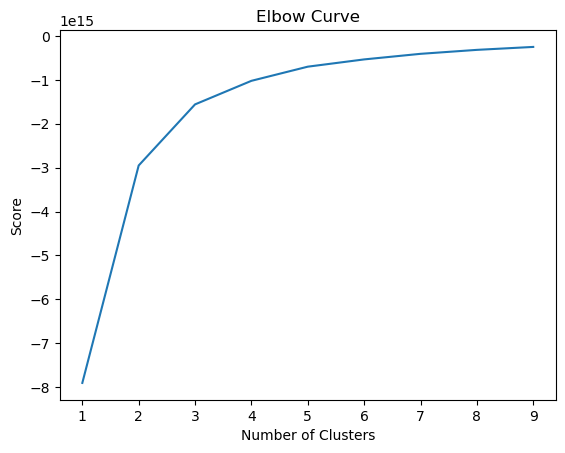

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# ellbow starts to flatten on the 3th cluster, which means, that for us optimal would be amount of 3 clusters.

In [19]:
# K- meas clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [21]:
# Fit the k-means object to the new boats data.

kmeans.fit(df1_new)

KMeans(n_clusters=3)

In [22]:
df1_new['clusters'] = kmeans.fit_predict(df1_new)

C:\Users\dog\AppData\Local\Temp\ipykernel_22756\1396333573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['clusters'] = kmeans.fit_predict(df1_new)


In [23]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 9191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_built         1892 non-null   int64  
 1   length             1892 non-null   float64
 2   width              1892 non-null   float64
 3   views_last_7_days  1892 non-null   int64  
 4   value              1892 non-null   int64  
 5   value_in_eur       1892 non-null   int64  
 6   clusters           1892 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 110.9 KB


In [24]:
df1_new['clusters'].value_counts()

0    1857
2      30
1       5
Name: clusters, dtype: int64

# year built vs views last 7 days of new boats

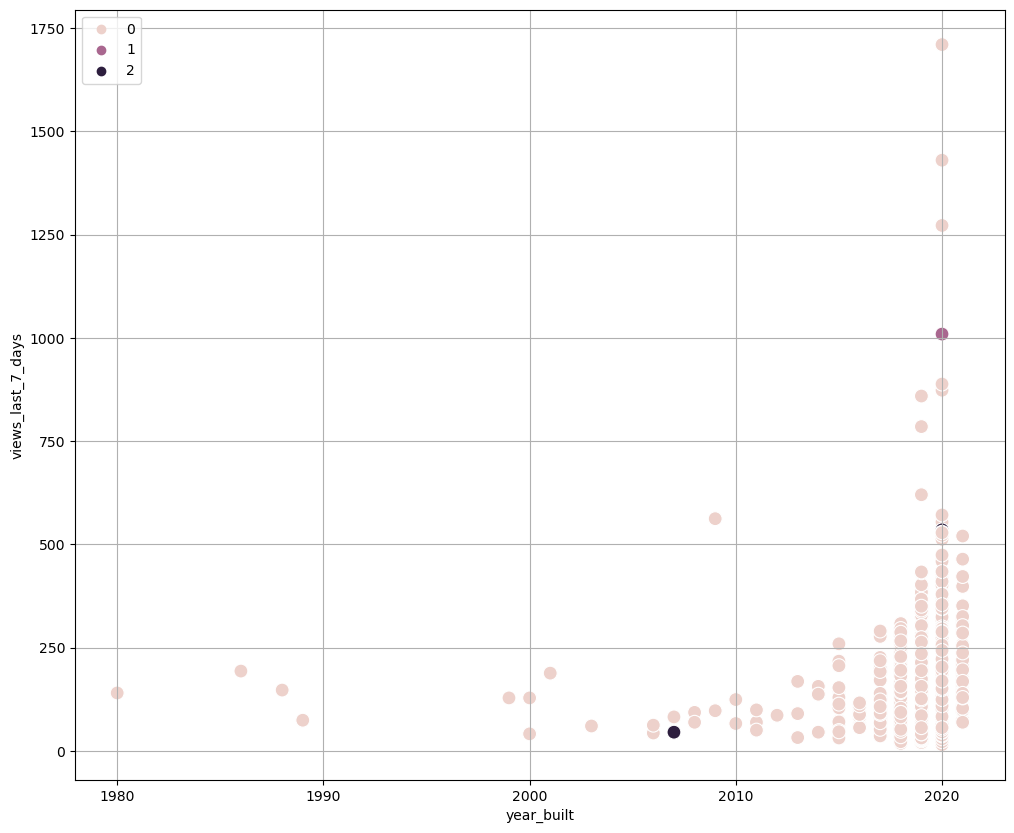

In [25]:
# Plot the clusters for the "year built" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_new['year_built'], y=df1_new['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('year_built') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# first cluster shows that as newer the boat is as more views it has, other clusters are spreaded due to low number of vlaues in those clusters

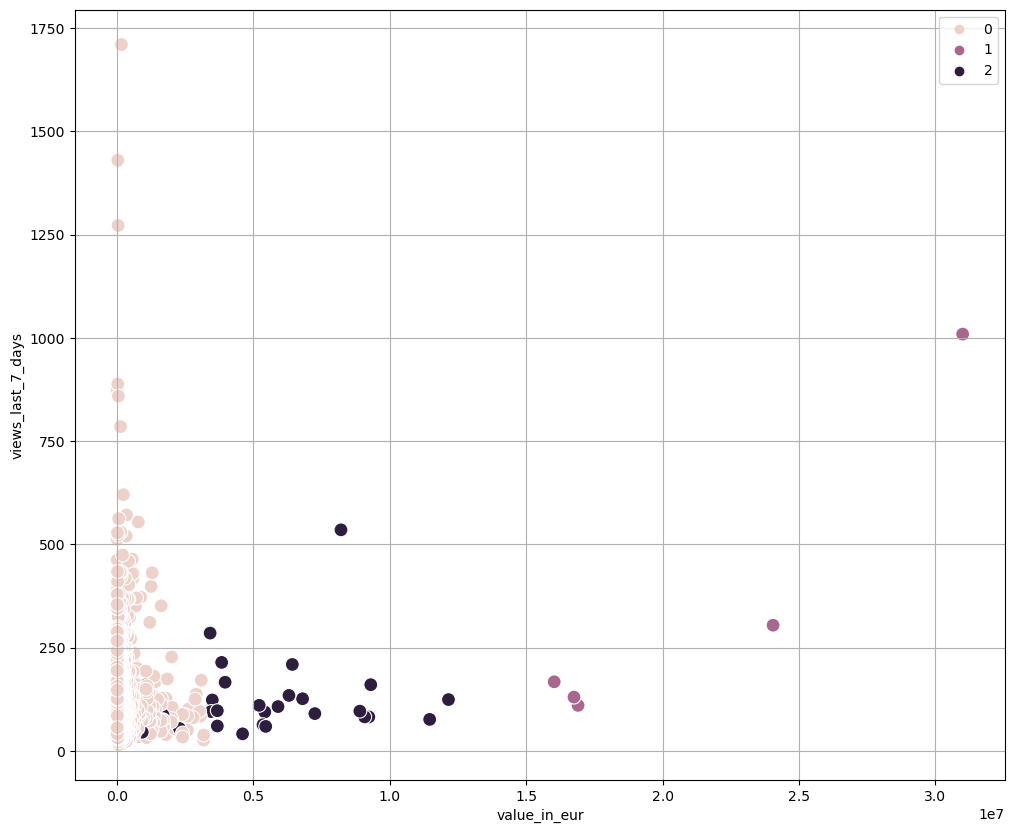

In [26]:
# Plot the clusters for the "value_in_eur" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_new['value_in_eur'], y=df1_new['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('value_in_eur') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# here we see more usueful information between the clusters. As lower the price is as more views the boat has. We see that it is pretty clustered and as higher the value is less possibility that the boat will have more views.

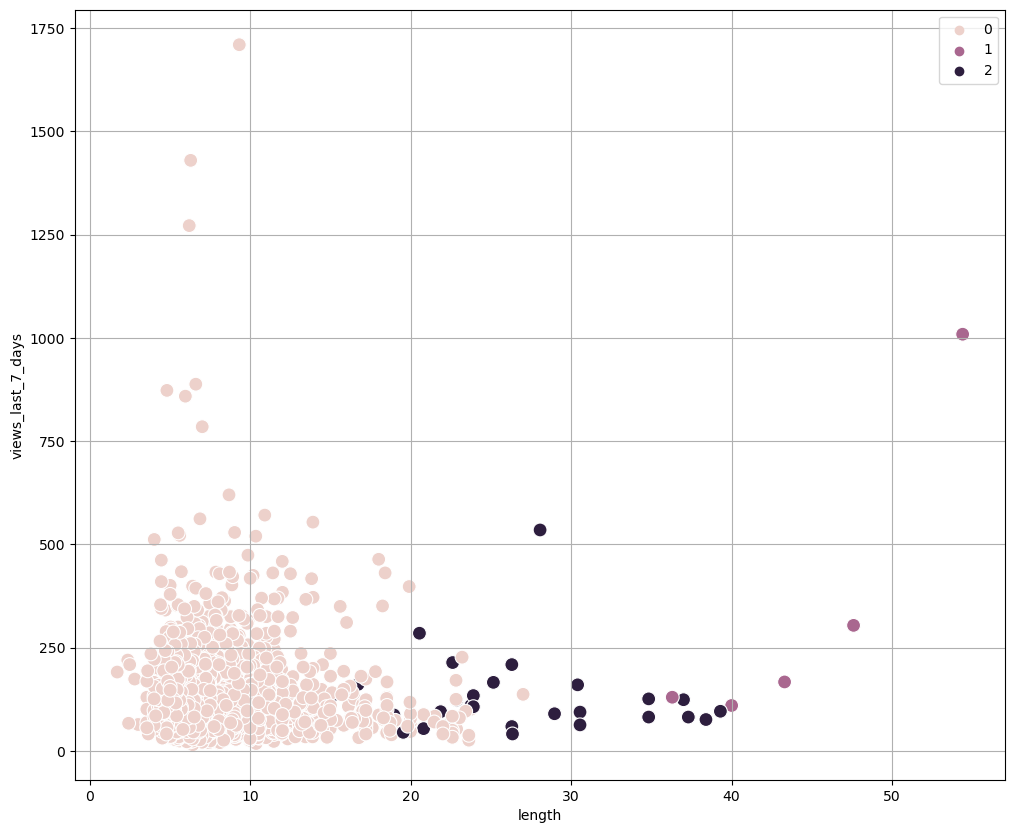

In [27]:
# Plot the clusters for the "length" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_new['length'], y=df1_new['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('length') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# Here we can spot that shorter boats has more views in general, middle length are staying between 50 and 300 in general and longer boats varies but as longer the boat is as more views it gets based on clusters we see. That can be due to low amount of boats in the long category and its higher price, therefore most likely this is the curiosity purpose on how the longest and the highest price boat looks like.

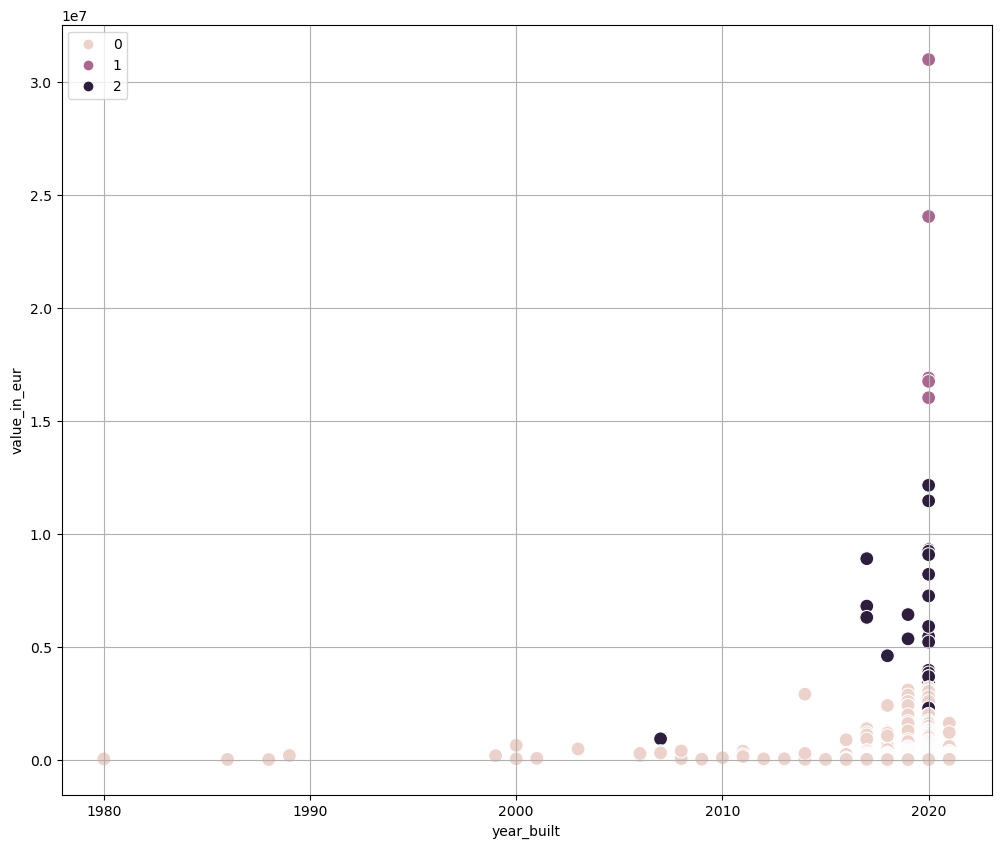

In [28]:
# Plot the clusters for the "year built" and "value_in_eur" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_new['year_built'], y=df1_new['value_in_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('year_built') # Label x-axis.
plt.ylabel('value_in_eur') # Label y-axis.
plt.show()

# We can see that the newer boat is the higher the price is on the platform in the category new boats. This can be viewed in all the clusters. 


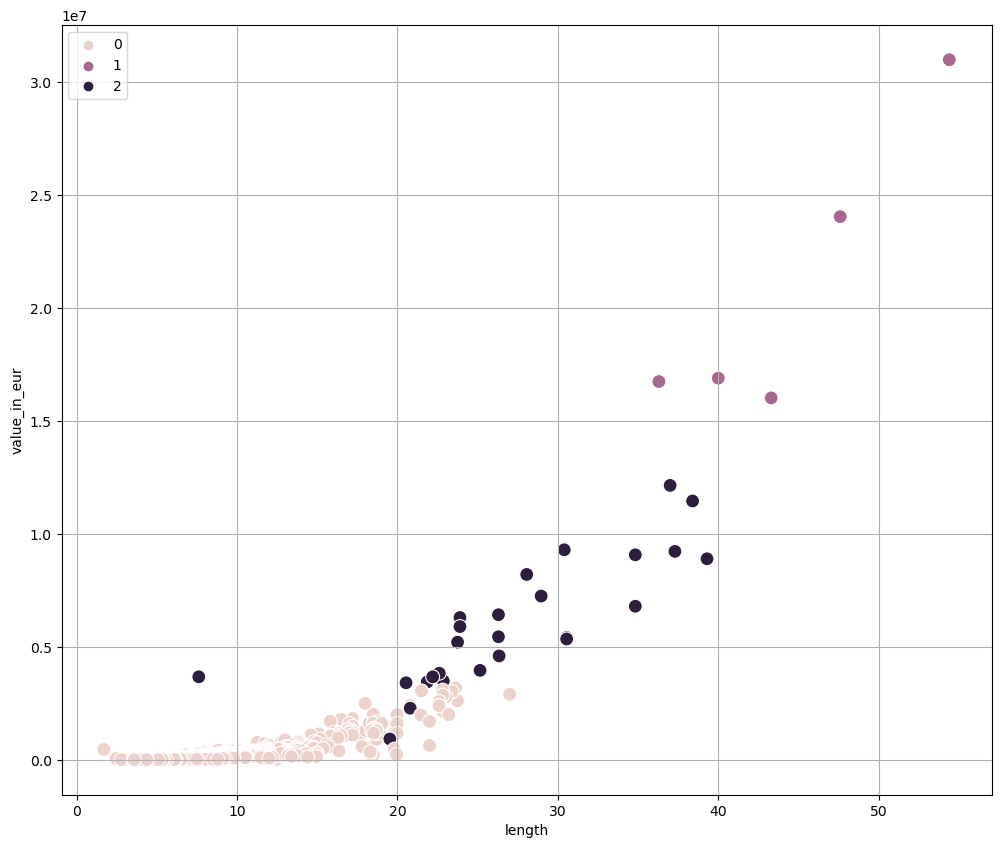

In [29]:
# Plot the clusters for the "length" and "value_in_eur" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_new['length'], y=df1_new['value_in_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('length') # Label x-axis.
plt.ylabel('value_in_eur') # Label y-axis.
plt.show()

# Here we also can see the same behaviour as we saw previously and as longer the boat is as higher the price comes. Clusters shows us the same behaviour.

# grouping the values in the new boats data set 

In [30]:
df1_new_clusters_groupby = df1_new.groupby('clusters').agg({'year_built':['mean', 'median'], 
                                 'length':['mean', 'median'],
                         'width':['mean', 'median'], 
                         'views_last_7_days':['mean', 'median'],
                                'value':['mean', 'median'],
                               'value_in_eur' :['mean', 'median']})

In [32]:
df1_new_clusters_groupby.head(10)

year_built             length             width         \
                 mean  median       mean  median      mean median   
clusters                                                            
0         2019.280560  2020.0   8.088971   7.130  2.816236  2.530   
1         2020.000000  2020.0  44.320000  43.300  8.980000  9.500   
2         2019.133333  2020.0  25.649333  24.525  6.366333  6.475   

         views_last_7_days                value              value_in_eur  \
                      mean median          mean      median          mean   
clusters                                                                    
0               130.910609  105.0  2.139846e+05     66043.0  1.736301e+05   
1               344.000000  167.0  2.094500e+07  16900000.0  2.094500e+07   
2               125.333333   96.5  6.867669e+06   5767576.5  5.330245e+06   

                      
              median  
clusters              
0            63006.0  
1         16900000.0  
2          5279425.0

# Grouping confirmed our hypothesis that as higher the length is as higher the price would be. We can see also that amount of views drops for the high value boats which are in middle length and that the very expensive boats with the high value has a lot of views. That was also seen before and can be caused by the curiosity.

# checking the same but in the used boat categories

In [33]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [34]:

score = [kmeans[i].fit(df1_used).score(df1_used) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8335731934593034.0,
 -3490057761661908.0,
 -2052232059687389.8,
 -1323404253999475.0,
 -944934735281095.6,
 -631240161195469.8,
 -485689031803324.56,
 -385237966647485.94,
 -311478513486524.4]

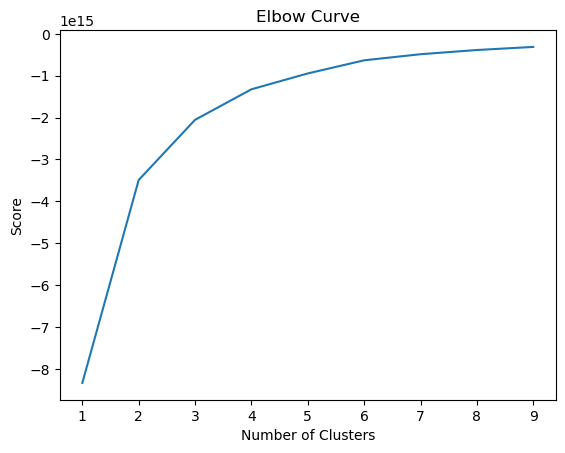

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# We see that it starts to floaten at 6. 

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 

In [37]:
# Fit the k-means object to the new boats data.

kmeans.fit(df1_used)

KMeans(n_clusters=6)

In [38]:
df1_used['clusters'] = kmeans.fit_predict(df1_used)

C:\Users\dog\AppData\Local\Temp\ipykernel_22756\1703633816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_used['clusters'] = kmeans.fit_predict(df1_used)


In [39]:
df1_used['clusters'].value_counts()

1    5969
3     883
0     187
2      50
4      12
5       1
Name: clusters, dtype: int64

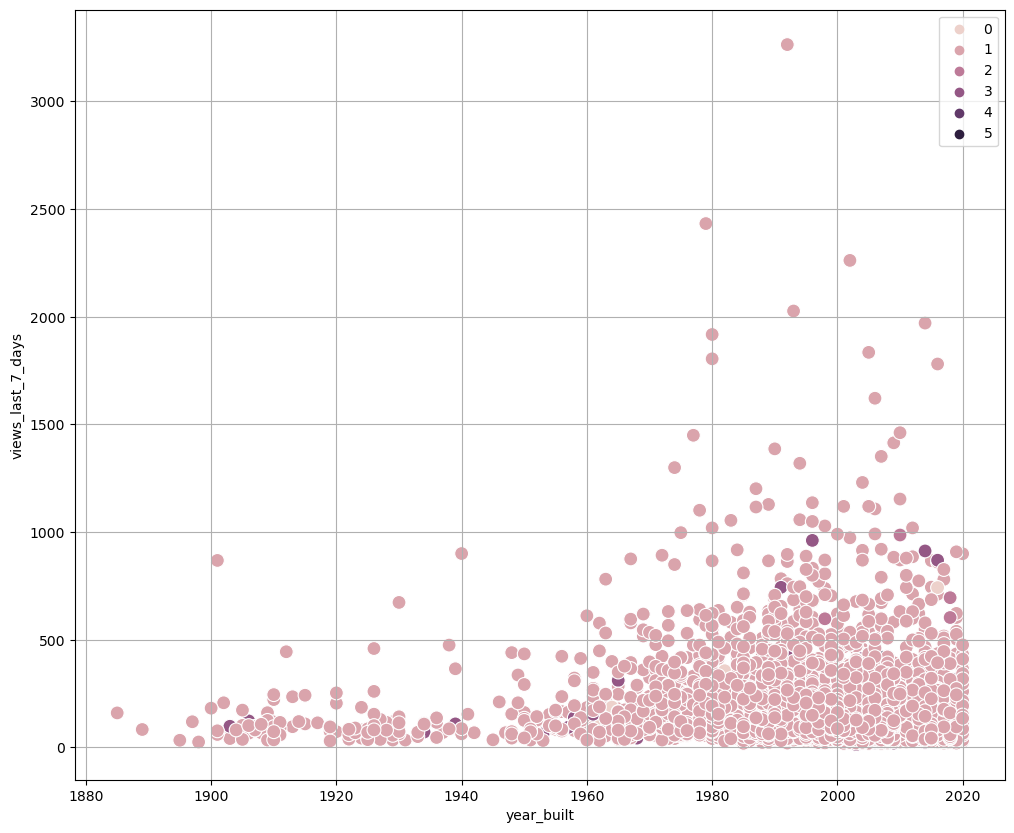

In [40]:
# Plot the clusters for the "year built" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_used['year_built'], y=df1_used['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('year_built') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# We can see that as newer the used boat is as more views it has. All the clusters behaving the same however it is hard to understand the outcome due to its spread

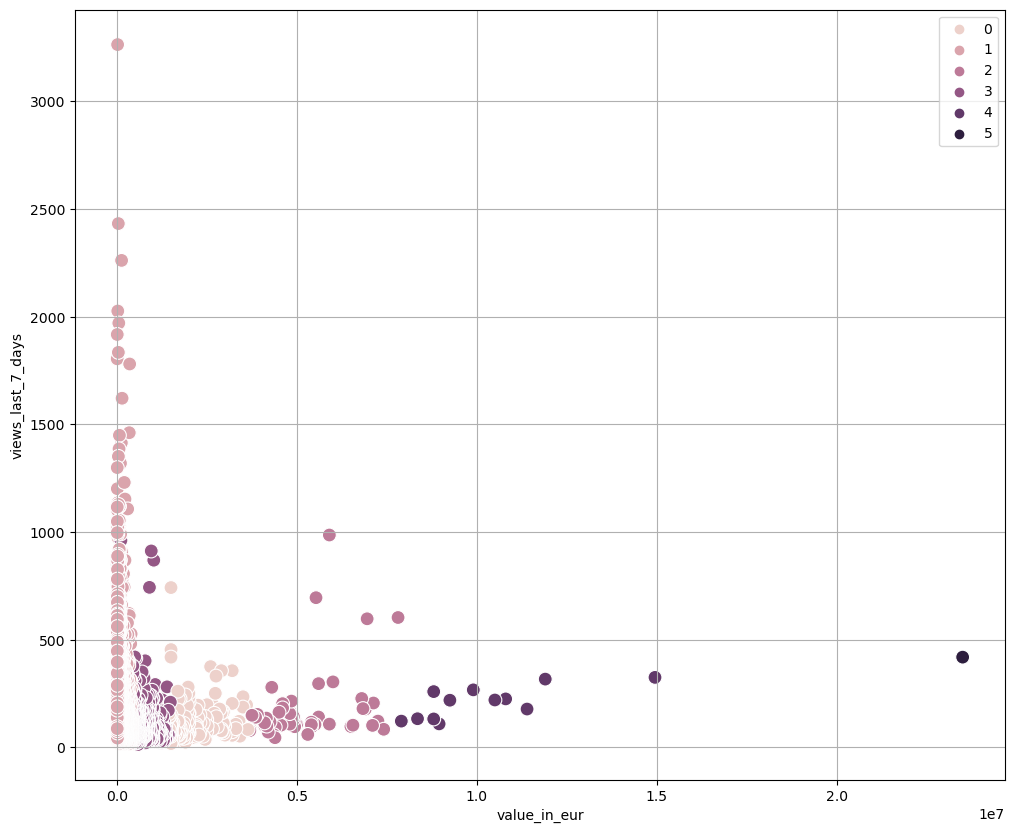

In [41]:
# Plot the clusters for the "value_in_eur" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_used['value_in_eur'], y=df1_used['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('value_in_eur') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# As it was also seen before as less the value is as higher the views are. We can see it in clusters and all of the clusters can be categorised based on the outcome

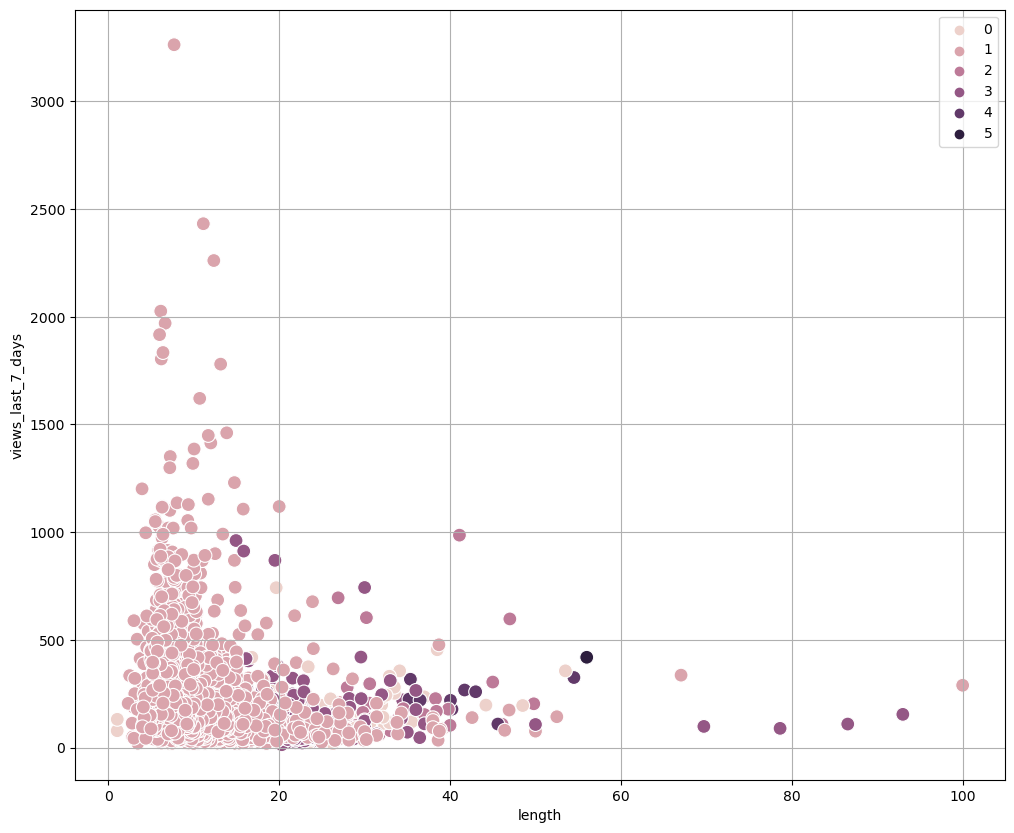

In [42]:
# Plot the clusters for the "length" and "views_last_7_days" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_used['length'], y=df1_used['views_last_7_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('length') # Label x-axis.
plt.ylabel('views_last_7_days') # Label y-axis.
plt.show()

# Here we also see the same trend as in the previous analysis. As shorter the boat is the more views it has. That varies in some of the clusters, however the general trend remains the same

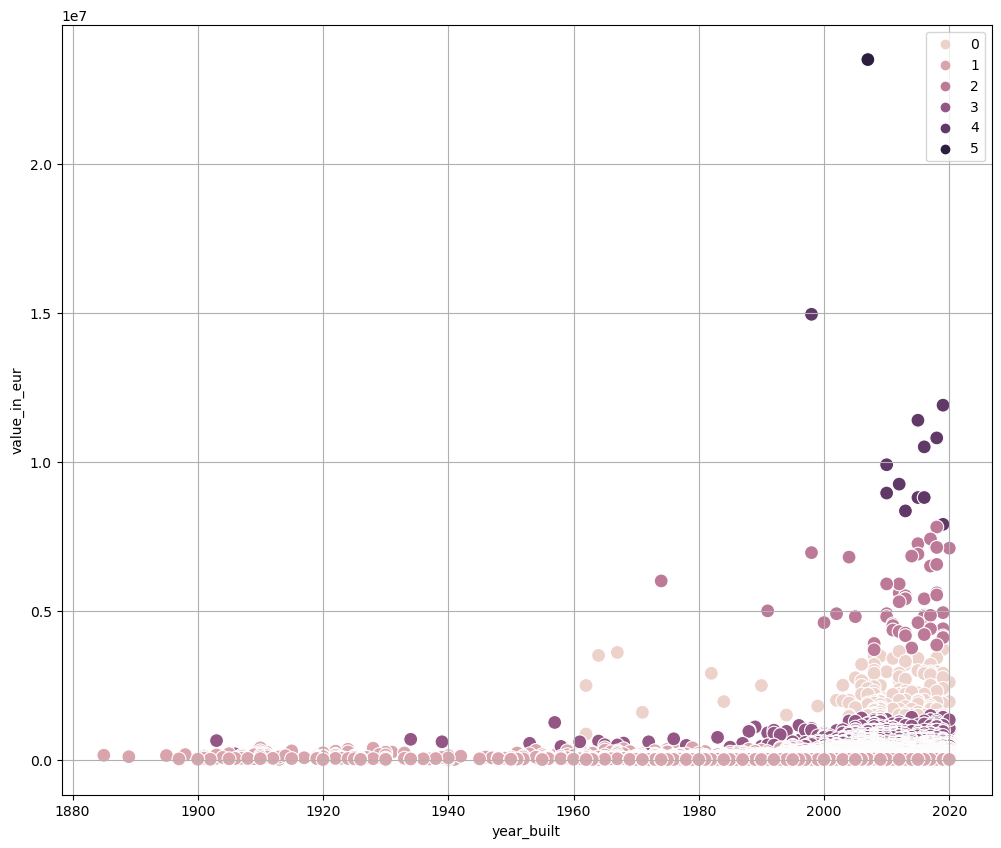

In [43]:
# Plot the clusters for the "year_built" and "value_in_eur" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_used['year_built'], y=df1_used['value_in_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('year_built') # Label x-axis.
plt.ylabel('value_in_eur') # Label y-axis.
plt.show()

# Here we also see that as newer the boat is the higher the price is. We see also the cluster where it has no difference between year and value, however that can be due to different condition of the used boat, which influences the price.

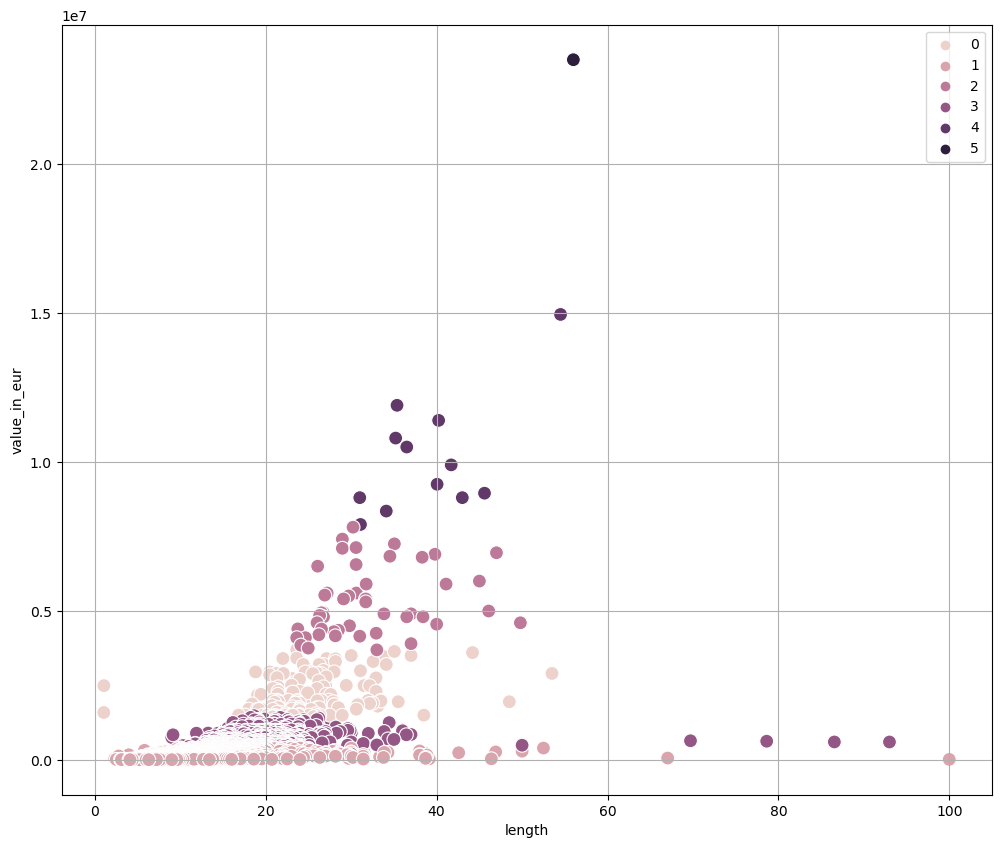

In [44]:
# Plot the clusters for the "length" and "value_in_eur" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df1_used['length'], y=df1_used['value_in_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This creates a grid in the background
plt.xlabel('length') # Label x-axis.
plt.ylabel('value_in_eur') # Label y-axis.
plt.show()

# The length and the value represent the relationship, almost all the clusters shows us that as longer the boat is the higher the value is. There are couple of outliers, however that can also be due to differnt condition of the used boats. 

# Grouping used boats data

In [45]:
df1_used_clusters_groupby = df1_used.groupby('clusters').agg({'year_built':['mean', 'median'], 
                                 'length':['mean', 'median'],
                         'width':['mean', 'median'], 
                         'views_last_7_days':['mean', 'median'],
                                'value':['mean', 'median'],
                               'value_in_eur' :['mean', 'median']})

In [48]:
df1_used_clusters_groupby.head(6)

year_built             length              width          \
                 mean  median       mean  median       mean  median   
clusters                                                              
0         2010.112299  2012.0  24.414385  23.850   6.134545   6.050   
1         1999.576646  2004.0  11.101082  10.590   3.495599   3.450   
2         2012.260000  2014.0  31.775200  30.385   7.251800   7.075   
3         2008.292186  2009.0  19.193567  18.610   5.062344   4.990   
4         2013.416667  2015.0  39.026667  38.275   8.021667   7.915   
5         2007.000000  2007.0  56.000000  56.000  10.400000  10.400   

         views_last_7_days                value              value_in_eur  \
                      mean median          mean      median          mean   
clusters                                                                    
0               117.320856   95.0  2.203984e+06   1990000.0  2.053504e+06   
1               159.603116  111.0  1.214288e+05     85000.0  1.199707e+05   
2               183.600000  125.5  5.123180e+06   4900000.0  5.267492e+06   
3               100.349943   81.0  7.285479e+05    649500.0  7.037063e+05   
4               208.833333  219.5  1.000792e+07   9575000.0  1.012452e+07   
5               419.000000  419.0  2.350000e+07  23500000.0  2.350000e+07   

                      
              median  
clusters              
0          1950000.0  
1            85000.0  
2          4918000.0  
3           640000.0  
4          9575000.0  
5         23500000.0

# Grouping confirms even more the hypothesis. As newer and shorter the boat is as more views it has. However we see those trends better in the scatterplots with clusters